# Итераторы, генераторы и генераторные выражения

## Итератор
***Итерируемый объект*** — это объект, который может состоять из множества элементов и предоставляет их по одному, когда это необходимо.  
***Итератор*** – это объект, который позволяет поочерёдно получать элементы коллекции без необходимости загружать их все в память сразу.    
Итератор содержит:  
* Ссылку на итерируемый объект – из которого он извлекает данные.
* Текущую позицию – он запоминает, где остановился при последнем вызове.
* Логику получения следующего элемента – сообщает как извлечь следующий элемент из итерируемого объекта.  

Итератор **не изменяет** коллекцию, на которую ссылается, а просто управляет процессом последовательного извлечения данных.  
Итераторы используются при работе с циклами for, ленивыми вычислениями, чтением файлов построчно и в других ситуациях, когда обработка данных должна выполняться эффективно и без лишнего расхода памяти.


### Методы iter и next
Для работы с итерацией используются два метода:
Итерация в Python основана на магических методах (или dunder-методах - сокращение от double underscore) – это специальные методы, которые вызываются автоматически при использовании встроенных механизмов языка, например цикла for.
Их названия начинаются и заканчиваются двойным подчёркиванием.

Для работы с итерацией используются два магических метода:
* `__iter__()` – создаёт объект итератора из итерируемого объекта.
* `__next__()` – выдаёт следующий элемент итерируемого объекта.


##### Пример: Создание объекта итератор


In [11]:
# numbers = [10, 20, 30]  # Обычный список
# iterator = numbers.__iter__()  # Получаем итератор

# print(iterator)  # Итератор для списка
# print(list(iterator))  # Преобразование в список

print(list(iterator))  # Второй раз список будет пустой

[]


##### Особенности:
* `numbers.__iter__()` создаёт итератор, связанный со списком.
* Второй раз список будет пустой, так как итератор "потрачен"


##### Пример: Последовательное получение элементов 

In [12]:
numbers = [10, 20, 30]
iterator = numbers.__iter__()  # Создаём итератор

print(iterator.__next__())  # Получаем нулевой элемент
print(iterator.__next__())  # Получаем первый элемент
print("-" * 30)  # Можно прерваться на другие действия
print(iterator.__next__())  # Получаем второй элемент


10
20
------------------------------
30


##### Особенности:
* `iterator.__next__()` возвращает следующий элемент.
* При каждом вызове итератор запоминает текущую позицию.


### Аналоги магических методов
Python предоставляет одноименные встроенные функции, которые вызывают магические методы "под капотом":
* `iter(obj)` – вызывает `obj.__iter__()`, создавая итератор из итерируемого объекта.
* `next(iterator)` – вызывает `iterator.__next__()`, возвращая следующий элемент.


##### Пример использования встроенных функций: 


In [13]:
numbers = [1, 2, 3]  # Итерируемый объект
iterator = iter(numbers)  # Вызывает numbers.__iter__()

print(next(iterator))  # Вызывает iterator.__next__()
print(next(iterator))  # Вызывает iterator.__next__()
print(next(iterator))  # Вызывает iterator.__next__()

1
2
3


### Оценка потребления памяти
Функция `sys.getsizeof()` позволяет измерять, сколько памяти занимает объект в байтах. Это полезно для сравнения объектов.


##### Пример: сравнение списка и итератора


In [14]:
import sys

# Список из 1 000 000 чисел
numbers_list = [x for x in range(1_000_000)]
print("Размер списка:", sys.getsizeof(numbers_list), "байт")

# Итератор, из списка
numbers_iterator = numbers_list.__iter__()
print("Размер итератора:", sys.getsizeof(numbers_iterator), "байт")


Размер списка: 8448728 байт
Размер итератора: 48 байт


### Ошибка StopIteration
Когда итератор исчерпал все доступные элементы, и метод `__next__()` не может вернуть следующий, возникает ошибка StopIteration.



In [15]:
numbers = [1, 2, 3]
iterator = iter(numbers)  # Создаём итератор

print(next(iterator))
print(next(iterator))
print(next(iterator))  # Последний элемент
print(next(iterator))  # Ошибка StopIteration


1
2
3


StopIteration: 

#### Как избежать StopIteration?
Функция `next()` поддерживает второй аргумент, который возвращается вместо ошибки StopIteration, если элементы в итераторе закончились.


In [16]:
numbers = [1, 2, 3]
iterator = iter(numbers)

print(next(iterator))
print(next(iterator))
print(next(iterator))
print(next(iterator, None))  # None вместо StopIteration
print(next(iterator, 0))  # 0 вместо StopIteration


1
2
3
None
0


## Как работает цикл for
Цикл for в Python используется для перебора итерируемых объектов (списки, строки, итераторы и т.д.).
Внутри себя for автоматически использует итератор, вызывая методы `__iter__()` и `__next__()`.

***Как for обрабатывает итерацию шаг за шагом***

При выполнении цикла for element in iterable: Python выполняет следующие действия:
1. Вызывает iter(iterable), чтобы получить итератор.
2. Вызывает next(iterator), чтобы получить следующий элемент.
3. Передаёт полученное значение в переменную цикла (element).
4. Повторяет шаги 2–3, пока next() не вызовет StopIteration.
5. Когда StopIteration возникает, цикл автоматически завершает работу без ошибки.


##### Пример работы цикла for: 


In [17]:
numbers = [10, 20, 30]  # Итерируемый объект

# Цикл for по итерируемому объекту
for num in numbers:
    print(num)

print()
    
iterator = iter(numbers)  # Итератор
# Цикл for по итератору
for num in iterator:
    print(num)


10
20
30

10
20
30


##### Как Python выполняет этот цикл внутри: 


In [ ]:
numbers = [10, 20, 30]  # Итерируемый объект
iterator = iter(numbers)  # Создание итератора

while True:
    try:
        num = next(iterator)  # Получаем следующий элемент
        print(num)
    except StopIteration:
        break  # Завершаем цикл при окончании элементов


#### Особенности итераторов
1. Экономия памяти
   * Итератор не хранит всю коллекцию в памяти, а запоминает ссылку на источник данных и текущую позицию. Это позволяет работать с большими данными без перегрузки памяти.
2. Последовательный доступ
   * Доступ к элементам происходит по порядку, перескочить к произвольному элементу нельзя.
3. Неизменяемость
   * Итератор не поддерживает изменение данных, он просто возвращает элементы.
4. Однократное использование
   * Итератор можно использовать только один раз – после полного прохода по элементам он становится "пустым", и для нового перебора нужно создать новый итератор.




## Модуль itertools
Модуль itertools предоставляет набор инструментов для работы с итераторами, позволяя создавать эффективные итерируемые последовательности, объединять, фильтровать и изменять потоки данных без лишнего расхода памяти.


#### Примеры использования itertools


##### 1. Бесконечная последовательность чисел (count()) 

In [ ]:
import itertools

counter = itertools.count(start=1, step=10)

print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))
print(next(counter))

##### 2. Бесконечное повторение элементов (cycle()) 

In [ ]:
cycler = itertools.cycle(["A", "B", "C"])

print(next(cycler)) 
print(next(cycler)) 
print(next(cycler))
print(next(cycler))  # A (повторяется)
print(next(cycler))  # B (повторяется)

##### 3. Объединение итерируемых объектов (chain()) 

In [ ]:
merged = itertools.chain([1, 2, 3], [100, 200, 300])

print(list(merged))

##### 4. Декартово произведение (product()) 

In [21]:
import itertools

pairs = itertools.product([1, 2, 3], ["A", "B", "C"])
print(pairs)
print(list(pairs))

[(1, 'A'), (1, 'B'), (1, 'C'), (2, 'A'), (2, 'B'), (2, 'C'), (3, 'A'), (3, 'B'), (3, 'C')]


In [22]:
import itertools

pairs = itertools.product([1, 2, 3], ["A", "B", "C"])
print(next(pairs))

(1, 'A')


In [23]:
print(next(pairs))

(1, 'B')


##### 5. Перестановки элементов (permutations())

Функция `itertools.permutations()` создаёт все возможные упорядоченные перестановки элементов.
Можно указать длину перестановки (r), или использовать всю последовательность по умолчанию. 

In [25]:
letters = ["A", "B", "C"]

# Все возможные перестановки
perms = itertools.permutations(letters)
print(list(perms))

# Все возможные перестановки длины 2
perms = itertools.permutations(letters, 2)
print(list(perms))


[('A', 'B', 'C'), ('A', 'C', 'B'), ('B', 'A', 'C'), ('B', 'C', 'A'), ('C', 'A', 'B'), ('C', 'B', 'A')]
[('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]


## Генератор
***Генератор*** – это специальный вид итератора, который создаёт элементы по запросу, вместо того чтобы загружать всю последовательность в память.
Все генераторы являются итераторами, но **не все итераторы являются генераторами**.  
Генераторы создаются с помощью:
* Генераторных функций – функций, использующих ключевое слово yield.
* Генераторных выражений – компактного способа создания генераторов в круглых скобках ( ... ).
  
Основные особенности генераторов:
* Ленивые вычисления – создают элементы только при запросе.
* Не занимают много памяти – не хранят всю последовательность в памяти.
* Сохраняют состояние – продолжают выполнение с того места, где остановились.
  
Используют yield вместо return – это делает их похожими на обычные функции, но с возможностью приостановки выполнения.
Генераторы удобны для обработки больших файлов, создания бесконечных последовательностей и работы с потоками данных.

### Функция с yield
Функция с `yield` — это функция, которая возвращает объект генератора. yield – это ключевое слово, которое используется для приостановки выполнения функции и возврата значения без завершения её работы (в отличие от `return`).  
При вызове `next()` у такого генератора выполнение функции приостанавливается на `yield`, сохраняя текущее состояние.  
При следующем вызове выполнение продолжается с того же места, а не начинается заново, как в обычных функциях.


#### Как работает yield?
* При первом вызове next() выполнение функции начинается с самого начала и продолжается до первого yield. Значение после yield возвращается.
* При следующем вызове next() выполнение продолжается с того места, где оно было остановлено (а не начинается заново).
* Функция работает, пока не завершит выполнение, после чего генератор вызывает StopIteration.


In [ ]:
def generator():
    yield value

* def generator(): – объявление функции, которая вернет генератор.
* yield – ключевое слово, приостанавливающее выполнение функции и возвращающее значение.
* value – результат, который будет передан при вызове next().

In [27]:
def generate_values():
    yield 1  # Приостанавливаем выполнение и возвращаем 1
    yield 3  # Приостанавливаем выполнение и возвращаем 2
    yield 5

gen = generate_values() 

print(next(gen))

1


In [28]:
print(next(gen))

3


In [29]:
print(next(gen))

5


In [30]:
print(next(gen))

StopIteration: 

##### Пример генератора с yield 


In [26]:
def generate_values():
    print("Начало работы")
    yield 1  # Приостанавливаем выполнение и возвращаем 1
    print("Продолжение работы")
    yield 2  # Приостанавливаем выполнение и возвращаем 2
    print("Завершение работы")

gen = generate_values()  # Создаём генератор, но код внутри функции пока не выполняется

print(next(gen))  # Начало работы → 1
print(next(gen))  # Продолжение работы → 2
print(next(gen))  # Завершение работы → StopIteration, так как нет третьего yield

Начало работы
1
Продолжение работы
2
Завершение работы


StopIteration: 

#### Генераторные функции с параметрами
Функция-генератор может принимать аргументы, которые передаются однократно при создании генератора и используются для генерации значений.


In [ ]:
def generator(param1, param2):
    yield value

* param1, param2 – аргументы, передаваемые при создании генератора.

##### Пример: Генератор чисел "n" раз 

In [32]:
def count_up_to(n):
    count = 1
    while count <= n:
        yield count  # Возвращаем текущее значение и "замораживаем" выполнение
        count += 1   # После следующего вызова next() продолжится отсюда

gen = count_up_to(5)

print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))  # StopIteration

1
2
3
4
5


StopIteration: 

#### Использование генератора в for
Генератор можно перебирать в цикле for, как и любой итератор.
В этом случае for автоматически вызывает next(), пока генератор не исчерпает все значения.

##### Пример: Генератор и for 

In [33]:
def count_up_to(n):
    count = 1
    while count <= n:
        yield count
        count += 1

gen = count_up_to(5)

for number in gen:
    print(number)

1
2
3
4
5


In [ ]:
#Какой результат выдаст следующий код? 
def countdown(n):
    while n > 0:
        yield n
        n -= 1

gen = countdown(3)

print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))


## Генераторное выражение
***Генераторное выражение*** – это способ создания последовательности значений без предварительного вычисления всех элементов. Вместо хранения данных в памяти оно вычисляет каждый следующий элемент только при необходимости.  
Генераторное выражение возвращает объект генератора, который является итератором и поддерживает метод `__next__()`, позволяя получать элементы по одному.
Оно похоже на списковое включение, но использует круглые скобки ( ... ) вместо квадратных [ ... ].


Генераторное выражение и списковое включение

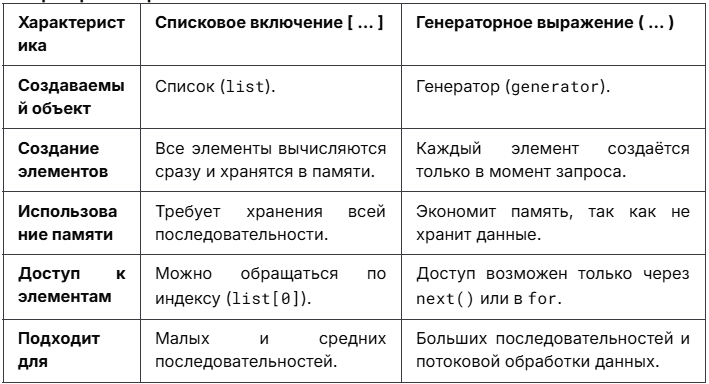

`generator = (expression for item in iterable)`


##### Пример 1: Создание генераторного выражения 


In [1]:
# Генерирует квадраты чисел от 0 до 4
squares = (x ** 2 for x in range(5))

print(squares)  # Объект генератора



<generator object <genexpr> at 0x0000023384877C60>


In [2]:
print(next(squares))
print(next(squares))
print(next(squares))
print(next(squares))
print(next(squares))

0
1
4
9
16


In [3]:
print(next(squares))

StopIteration: 

In [5]:
squares_lst = [x ** 2 for x in range(5)]
print(*squares_lst)

0 1 4 9 16


Особенности:
* Возвращает генератор, а не сразу список значений.
* `next()` вычисляет следующий элемент только при запросе.


##### Пример 2: Генераторное выражение в for 


In [6]:
squares = (x ** 2 for x in range(5))

for num in squares:
    print(num)

0
1
4
9
16


##### Особенности:
* Генератор автоматически перебирается в for, без явного вызова next().
* После прохода по всем элементам он исчерпывается и повторно использовать его нельзя.

##### Пример 3: Потребление памяти 

In [7]:
import sys

list_comp = [x**2 for x in range(10**6)]  # Списковое включение
gen_expr = (x**2 for x in range(10**6))  # Генераторное выражение

print("Размер списка:", sys.getsizeof(list_comp), "байт")
print("Размер генератора:", sys.getsizeof(gen_expr), "байт")


Размер списка: 8448728 байт
Размер генератора: 200 байт


##### Особенности:
* Список занимает много памяти, так как хранит все элементы сразу.
* Генератор почти не занимает памяти, так как создаёт элементы по мере запроса.


#### Использование генераторных выражений
Генераторные выражения можно передавать в аргументы функций, где ожидается итерируемый объект.

|Это особенно полезно при обработке больших последовательностей.


##### Пример: Генераторное выражение в any() и all() 

In [8]:
words = ["apple", "Banana", "cherry", "Apricot"]

print(any(word[0].isupper() for word in words))  # Есть слово с заглавной буквы
print(all(len(word) > 3 for word in words))  # Все слова длиннее 3 букв

True
True


In [9]:
numbers = [12, 15, 33, 40, 55, 62, 75, 83, 90]

print(sum(n for n in numbers))

465


In [10]:
numbers = [12, 15, 33, 40, 55, 62, 75, 83, 90]

print(sum([n for n in numbers]))

465


# Практические задания
1. ***Фильтр чисел***
Создайте генератор, который принимает список чисел и выдаёт только числа, кратные 5.  
Данные:   
`numbers = [12, 15, 33, 40, 55, 62, 75, 83, 90]`

Пример вывода:   
15  
40  
55  
75  
90


In [11]:
def filter_by_five(numbers):
    for num in numbers:
        if num % 5 == 0:
            yield num

numbers = [12, 15, 33, 40, 55, 62, 75, 83, 90]
gen = filter_by_five(numbers)

for num in gen:
    print(num)

15
40
55
75
90


2. ***Генерация безопасных паролей***  
Программа должна сгенерировать все возможные пароли длиной 4 символа, соблюдая следующие условия:  
* Пароль должен содержать хотя бы одну заглавную букву, одну строчную букву и одну цифру.
* Символы не должны повторяться.
  
Соседние символы не могут быть расположены подряд в таблице символов.  
Все подходящие пароли записываются в файл valid_passwords.txt.  
*Данные:*   
`from string import ascii_lowercase, ascii_uppercase, digits`

Пример данных в файле:   
acA0  
acA1  
acA2  
acA3  
acA4  
acA5  
acA6  
acA7  
acA8  
...  


In [1]:
from itertools import permutations
from string import ascii_lowercase, ascii_uppercase, digits

all_chars = list(ascii_lowercase + ascii_uppercase + digits)


# Фильтр для проверки условий пароля
def is_valid(password):
    has_lower = any(c in ascii_lowercase for c in password)
    has_upper = any(c in ascii_uppercase for c in password)
    has_digit = any(c in digits for c in password)

    if not (has_lower and has_upper and has_digit):
        return False

    for i in range(len(password) - 1):
        if abs(ord(password[i]) - ord(password[i + 1])) == 1:
            return False

    return True


# Генерация всех перестановок
all_variants = permutations(all_chars, 4)


valid_passwords = ("".join(p) for p in all_variants if is_valid(p))

with open("valid_passwords.txt", "w") as file:
    file.write("\n".join(valid_passwords))